<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

## Import Boston Housing Dataset

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
import numpy as np

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [2]:
# concatenate all data into one array for fit/transform, normalization

set1 = np.append(x_train, y_train.reshape(-1,1), 1)
set2 = np.append(x_test, y_test.reshape(-1,1), 1)

data = np.append(set1, set2, 0)

In [3]:
data[:,13]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## Build normalization pipeline

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()

norm_pipe = Pipeline([
    ('scaler', scaler)
])

In [5]:
from sklearn.model_selection import train_test_split

# Transform data and regenerate X_train, y_train ...
data_transformed = norm_pipe.fit_transform(data)

X = data_transformed[:,0:13]
y = data_transformed[:,13:]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [6]:
X[0][12], y[0][0]

(0.7356321839080457, -0.7523510971786832)

## Define Network

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13,input_dim=13, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
model.fit(X_train,y_train, epochs=1000, verbose=0)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.evaluate(X_test, y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[-5.304170898362702, 1.1062098]

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

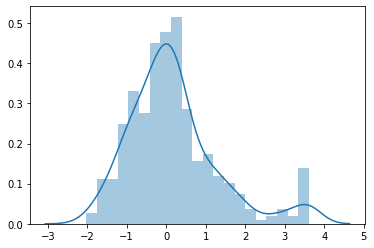

In [11]:
ax = sns.distplot(y_train)

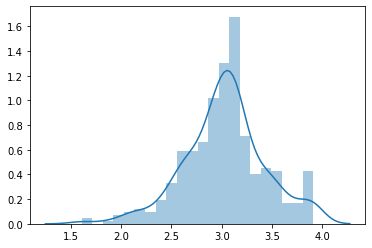

In [12]:
ax = sns.distplot(np.log(set1[:,13:]))

In [13]:
y_train[0:5]

array([[-1.78056426],
       [-1.55485893],
       [ 1.29153605],
       [ 0.18808777],
       [ 0.78996865]])

In [15]:
import pandas as pd

# Get prediction back out

prediction_set_transformed = model.predict(X_test)

# invert transform to see real value differences
prediction_set = np.append(X_test, prediction_set_transformed, 1)
prediction = norm_pipe.inverse_transform(prediction_set)

# combine targets to review
y_test = set2[:, 13:]
y_pred = prediction[:, 13:]

df = pd.DataFrame(np.append(y_test, y_pred, 1))
df.columns = ['y_test', 'y_pred']
df['diff'] = df.y_test - df.y_pred
df.head()

,y_test,y_pred,diff
0,7.2,11.376874,-4.176874
1,18.8,19.438504,-0.638504
2,19.0,19.052431,-0.052431
3,27.0,29.611300,-2.611300
4,22.2,18.214059,3.985941


**Results** are not fantastic.  I think I'm introducing unnecessary compute complexity in transforming the target with RobustScaler.  The transform -> inverse_transform introduce a lot of potential error and also reduces the extreme differences in price/feature_set seen in this set.  Might be good for constraining targets if targets thesmelves 'should' exist within a certain range.

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

## Import Fashion-MNIST dataset

In [100]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test_original) = fashion_mnist.load_data()
y_test = y_test_original

In [101]:
x_train.shape

(60000, 28, 28)

In [102]:
# input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

## Build Normalization Pipeline

In [103]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

mnist_pipe = Pipeline([
    ('scaler', minmax)
])

In [104]:
# Transform features
X_train = mnist_pipe.fit_transform(x_train)
X_test = mnist_pipe.fit_transform(x_test)

In [105]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [106]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [107]:
# store original y_train, y_test
y_train_original = y_train
y_teste_original = y_test

In [108]:
# One-hot encode target
from sklearn.preprocessing import OneHotEncoder

target_encoder = OneHotEncoder(
    categories='auto',
    drop='first',
)

In [109]:
y_train = target_encoder.fit_transform(y_train.reshape(-1,1)).todense()
y_test = target_encoder.transform(y_test.reshape(-1,1)).todense()

In [110]:
# Check categories
target_encoder.categories_

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)]

## Define Sequential Network

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn = Sequential()

nn.add(Dense(784, input_dim=784))
nn.add(Dense(100, activation='relu'))
nn.add(Dense(100, activation='relu'))
nn.add(Dense(100, activation='relu'))
nn.add(Dense(9, activation='sigmoid'))

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

nn.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_25 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_28 (Dense)             (None, 9)                 909       
Total params: 715,049
Trainable params: 715,049
Non-trainable params: 0
_________________________________________________________________


In [116]:
nn.fit(X_train, y_train, epochs=50, verbose=2)

Train on 60000 samples
Epoch 1/50
60000/60000 - 5s - loss: 0.0895 - binary_accuracy: 0.9644
Epoch 2/50
60000/60000 - 5s - loss: 0.0680 - binary_accuracy: 0.9731
Epoch 3/50
60000/60000 - 5s - loss: 0.0631 - binary_accuracy: 0.9749
Epoch 4/50
60000/60000 - 5s - loss: 0.0600 - binary_accuracy: 0.9763
Epoch 5/50
60000/60000 - 5s - loss: 0.0564 - binary_accuracy: 0.9776
Epoch 6/50
60000/60000 - 5s - loss: 0.0550 - binary_accuracy: 0.9778
Epoch 7/50
60000/60000 - 5s - loss: 0.0527 - binary_accuracy: 0.9791
Epoch 8/50
60000/60000 - 5s - loss: 0.0514 - binary_accuracy: 0.9794
Epoch 9/50
60000/60000 - 5s - loss: 0.0503 - binary_accuracy: 0.9798
Epoch 10/50
60000/60000 - 5s - loss: 0.0493 - binary_accuracy: 0.9803
Epoch 11/50
60000/60000 - 5s - loss: 0.0484 - binary_accuracy: 0.9805
Epoch 12/50
60000/60000 - 5s - loss: 0.0474 - binary_accuracy: 0.9810
Epoch 13/50
60000/60000 - 5s - loss: 0.0459 - binary_accuracy: 0.9817
Epoch 14/50
60000/60000 - 5s - loss: 0.0454 - binary_accuracy: 0.9817
Epoch 

## Generate predictions and recode so single digits

In [117]:
# Check score on test set
nn.evaluate(X_test, y_test, verbose=0)

[0.08012885845899582, 0.9797]

In [118]:
## Generate predictions
predictions = nn.predict(X_test)

In [119]:
# Manipulate to single digit based on column, returning 0 if none of the probabilities ar near 1
df = pd.DataFrame(predictions)
df.columns = range(1,10)

In [120]:
# Transform probabilities into int_max
df = pd.DataFrame(df.mul([1,2,3,4,5,6,7,8,9]).max(axis=1).round().astype('int'))

In [121]:
# Label and append y_test
df.columns = ['y_pred']
df['y_test'] = y_test_original
df.head(10)

,y_pred,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
5,1,1
6,4,4
7,6,6
8,5,5
9,7,7


In [122]:
# Visualize where it went wrong
errors = df[df.y_pred != df.y_test]
errors.head(), errors.describe()

(    y_pred  y_test
 12       8       7
 17       2       4
 23       5       9
 25       1       4
 26       5       6,             y_pred       y_test
 count  2114.000000  2114.000000
 mean      3.182119     3.921949
 std       1.816849     2.713319
 min       0.000000     0.000000
 25%       2.000000     2.000000
 50%       3.000000     4.000000
 75%       4.000000     6.000000
 max       9.000000     9.000000)

In [123]:
# Check Test Accuracy
print((1 - errors.count().mean()/df.count().mean())*100)

78.86


**Interesting** findings.  It appears as though the network is mistaking the digits enough, sucht that the true accuracy is closer to 79%.  The loss function needs to take the reduction to digit into account.  Another option would be to build a smaller network to transfer these learnings onto!

## Transfer Learning

In [124]:
# Build another small network that looks at predictions from the first network and translates the raw form directly into digits

nn2 = Sequential()

nn2.add(Dense(9, input_dim=9))
nn2.add(Dense(2, activation='relu'))
nn2.add(Dense(1))

nn2.compile(loss='huber_loss', optimizer='adam', metrics=['accuracy'])

nn2.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 3         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [125]:
nn2.fit(nn.predict(X_train), y_train_original, epochs=10, verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 5s - loss: 0.7385 - accuracy: 0.1051
Epoch 2/10
60000/60000 - 4s - loss: 0.1965 - accuracy: 0.1655
Epoch 3/10
60000/60000 - 4s - loss: 0.1942 - accuracy: 0.1701
Epoch 4/10
60000/60000 - 4s - loss: 0.1936 - accuracy: 0.1709
Epoch 5/10
60000/60000 - 4s - loss: 0.1933 - accuracy: 0.1710
Epoch 6/10
60000/60000 - 4s - loss: 0.1927 - accuracy: 0.1711
Epoch 7/10
60000/60000 - 4s - loss: 0.1922 - accuracy: 0.1716
Epoch 8/10
60000/60000 - 4s - loss: 0.1918 - accuracy: 0.1716
Epoch 9/10
60000/60000 - 4s - loss: 0.1913 - accuracy: 0.1714
Epoch 10/10
60000/60000 - 4s - loss: 0.1906 - accuracy: 0.1718


In [126]:
# Finally, re-run evaluation
predictions2 = nn2.predict(nn.predict(X_test), verbose=0)

In [127]:
# some labeling
df2 = pd.DataFrame(predictions2)
df2.columns = ['y_pred']

In [128]:
# casting the predictions as int and adding y_test
df2 = pd.DataFrame(df2.y_pred.round().astype('int'))
df2['y_test'] = y_test_original

In [129]:
# Create erors df
errors2 = df2[df2.y_pred != df2.y_test]
errors2.head(), errors2.describe()

(    y_pred  y_test
 12       8       7
 17       2       4
 23       5       9
 25       3       4
 27       1       0,             y_pred       y_test
 count  1838.000000  1838.000000
 mean      3.860718     3.754625
 std       1.967391     2.639297
 min       0.000000     0.000000
 25%       3.000000     2.000000
 50%       4.000000     4.000000
 75%       5.000000     6.000000
 max      16.000000     9.000000)

In [130]:
# Check Test Accuracy
print((1 - errors2.count().mean()/df2.count().mean())*100)

81.62


**An improvent** of 0.6% on a small layer is seen.  Further optimization might yield better results.  Likely a different network layout besides simple dense representations is required.

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.